# Introduction to Pandas

Pandas is a Python package that provides fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive

### Notebook lessons 

**1.- Load a csv/tsv/excel file and explore it**

**2.- Basic Data Exploration**

**3.- Column operations**

**4.- Row operations**

**5.- Groupby**

**6.- Apply and Lambda**



## 1.- Load a csv/tsv/excel file and explore it

The first thing that needs to be done is to load the package so that it can be used. As a convention the **pandas library is always imported as pd**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

After we can use the package the initial step is to load the dataset that we will use. To do so we use the function **read_csv** from pandas. 

In [52]:
df = pd.read_csv('../datasets/Dataset_credit_scoring.tsv', sep='\t')

In [53]:
df_excel = pd.read_excel('../datasets/Dataset_credit_scoring.xlsx')

In [54]:
df_excel.head()

,Occupation,Age,Loan_Salary_ratio,Outcome
0,Industrial,34,2.96,Repay
1,Professional,41,4.64,Default
2,Professional,36,3.22,Default
3,Professional,41,3.11,Default
4,Industrial,48,3.80,Default


## 2.- Basic Data Exploration

The next step is to explore the data. To do so we normally employ some simple functions such as head(), info(), describe(), dtypes, columns, index, 

In [55]:
df.head()

,Occupation,Age,Loan_Salary_ratio,Outcome
0,Industrial,34,2.96,Repay
1,Professional,41,4.64,Default
2,Professional,36,3.22,Default
3,Professional,41,3.11,Default
4,Industrial,48,3.80,Default


In [56]:
df.tail()

,Occupation,Age,Loan_Salary_ratio,Outcome
5,Industrial,61,2.53,Repay
6,Professional,37,1.50,Repay
7,Professional,40,1.93,Repay
8,Industrial,33,5.25,Default
9,Industrial,32,4.15,Default


In [57]:
df.head(8)

,Occupation,Age,Loan_Salary_ratio,Outcome
0,Industrial,34,2.96,Repay
1,Professional,41,4.64,Default
2,Professional,36,3.22,Default
3,Professional,41,3.11,Default
4,Industrial,48,3.80,Default
5,Industrial,61,2.53,Repay
6,Professional,37,1.50,Repay
7,Professional,40,1.93,Repay


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Occupation         10 non-null     object 
 1   Age                10 non-null     int64  
 2   Loan_Salary_ratio  10 non-null     float64
 3   Outcome            10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 448.0+ bytes


In [59]:
df.columns

Index(['Occupation', 'Age', 'Loan_Salary_ratio', 'Outcome'], dtype='object')

In [60]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [61]:
df.describe()

,Age,Loan_Salary_ratio
count,10.000000,10.00000
mean,40.300000,3.30900
std,8.692909,1.17557
min,32.000000,1.50000
25%,34.500000,2.63750
50%,38.500000,3.16500
75%,41.000000,4.06250
max,61.000000,5.25000


## 3.- Column Operations

In [62]:
df.columns

Index(['Occupation', 'Age', 'Loan_Salary_ratio', 'Outcome'], dtype='object')

In [63]:
df['Outcome']

0      Repay
1    Default
2    Default
3    Default
4    Default
5      Repay
6      Repay
7      Repay
8    Default
9    Default
Name: Outcome, dtype: object

In [64]:
df['Outcome'].value_counts()

Default    6
Repay      4
Name: Outcome, dtype: int64

In [65]:
df['Outcome'].unique()

array(['Repay', 'Default'], dtype=object)

In [66]:
df['Outcome'].nunique()

2

In [67]:
print(df['Age'].min(), df['Age'].max())

32 61


In [68]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

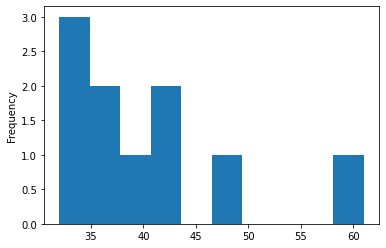

In [69]:
df['Age'].plot(kind='hist')

<AxesSubplot:>

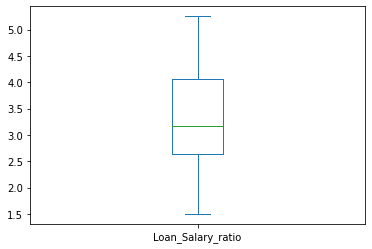

In [70]:
df['Loan_Salary_ratio'].plot(kind = 'box')

Columns are the backbone for any AI or ML model. They represent the features of any possible the model. Therefore, it is important to work with them in pandas. In addition to the simple operations above, some more things can be done:

- Separate dataframes
- Filter data by selecting a certain number of columns
- Create new columns through an operation 

### Separate dataframes

In [71]:
df['Age'] > 40

0    False
1     True
2    False
3     True
4     True
5     True
6    False
7    False
8    False
9    False
Name: Age, dtype: bool

In [81]:
df_age_40 = df[df['Age'] > 40]
df_age_40.head()

,Occupation,Age,Loan_Salary_ratio,Outcome,Age_Loan_Salary_ratio
1,Professional,41,4.64,Default,8.836207
3,Professional,41,3.11,Default,13.183280
4,Industrial,48,3.80,Default,12.631579
5,Industrial,61,2.53,Repay,24.110672


### Filter data by selecting a certain number of columns

### Create new columns through an operation

In [76]:
df['Age'] / df['Loan_Salary_ratio']

0    11.486486
1     8.836207
2    11.180124
3    13.183280
4    12.631579
5    24.110672
6    24.666667
7    20.725389
8     6.285714
9     7.710843
dtype: float64

In [77]:
df['Age_Loan_Salary_ratio'] = df['Age'] / df['Loan_Salary_ratio']

In [78]:
df.head()

,Occupation,Age,Loan_Salary_ratio,Outcome,Age_Loan_Salary_ratio
0,Industrial,34,2.96,Repay,11.486486
1,Professional,41,4.64,Default,8.836207
2,Professional,36,3.22,Default,11.180124
3,Professional,41,3.11,Default,13.183280
4,Industrial,48,3.80,Default,12.631579


In [26]:
df.loc[0]

Occupation           Industrial
Age                          34
Loan_Salary_ratio          2.96
Outcome                   Repay
Name: 0, dtype: object

In [8]:
df.iloc[1]

Occupation           Professional
Age                            41
Loan_Salary_ratio            4.64
Outcome                   Default
Name: 1, dtype: object

In [9]:
df.index = df.Age

In [10]:
df

,Occupation,Age,Loan_Salary_ratio,Outcome
Age,,,,
34,Industrial,34,2.96,Repay
41,Professional,41,4.64,Default
36,Professional,36,3.22,Default
41,Professional,41,3.11,Default
48,Industrial,48,3.80,Default
61,Industrial,61,2.53,Repay
37,Professional,37,1.50,Repay
40,Professional,40,1.93,Repay
33,Industrial,33,5.25,Default


In [11]:
df.loc[32]

Occupation           Industrial
Age                          32
Loan_Salary_ratio          4.15
Outcome                 Default
Name: 32, dtype: object

## 4.- Row Operations

## 5.- Groupby

## 6.- Apply & Lambda